In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

## Binary morphology

In [2]:
def get_members_CROSS(i, j, shape, N):
    members = []
    A = N//2
    (m, n) = shape
    for k in range(-1*A, A+1):
        if(i>=k and m > (i-k)):
            members.append([i-k, j])
        if(j>=k and n > (j-k) and k!=0):
            members.append([i, j-k])
    return members

def get_members_SQUARE(i, j, shape, N):
    members = []
    A = N//2
    (m, n) = shape
    for p in range(-1*A, A+1):
        for q in range(-1*A, A+1):
            if((i-p)>=0 and (i-p)<m and (j-q)>=0 and (j-q)<n):
                members.append([i-p, j-q])
        
    return members

def DILATE(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                ans = False
                for member in members:
                    ans = ans or (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                ans = False
                for member in members:
                    ans = ans or (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
    return Image

def ERODE(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                ans = True
                for member in members:
                    ans = ans and (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                ans = True
                for member in members:
                    ans = ans and (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
    return Image

def MEDIAN(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                count = [0, 0]
                for member in members:
                    if(Image[member[0], member[1]] == 0):
                        count[0] += 1
                    else:
                        count[1] += 1
                Image[i, j] = 0 if (count[0] > count[1]) else 1
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                count = [0, 0]
                for member in members:
                    if(Image[member[0], member[1]] == 0):
                        count[0] += 1
                    else:
                        count[1] += 1
                Image[i, j] = 0 if (count[0] > count[1]) else 1
    return Image

In [3]:
bin_apc = mpimg.imread('apc.png')
bin_airport = mpimg.imread('airport.png')
bin_airplane = mpimg.imread('airplane.png')
bin_truck = mpimg.imread('truck.png')

### DILATE

In [4]:
bin_apc_dia_cr = DILATE(bin_apc, {'CROSS': 5})
bin_apc_dia_sq = DILATE(bin_apc, {'SQUARE': 3})

bin_airport_dia_cr = DILATE(bin_airport, {'CROSS': 5})
bin_airport_dia_sq = DILATE(bin_airport, {'SQUARE': 3})

bin_airplane_dia_cr = DILATE(bin_airplane, {'CROSS': 5})
bin_airplane_dia_sq = DILATE(bin_airplane, {'SQUARE': 3})

bin_truck_dia_cr = DILATE(bin_truck, {'CROSS': 5})
bin_truck_dia_sq = DILATE(bin_truck, {'SQUARE': 3})

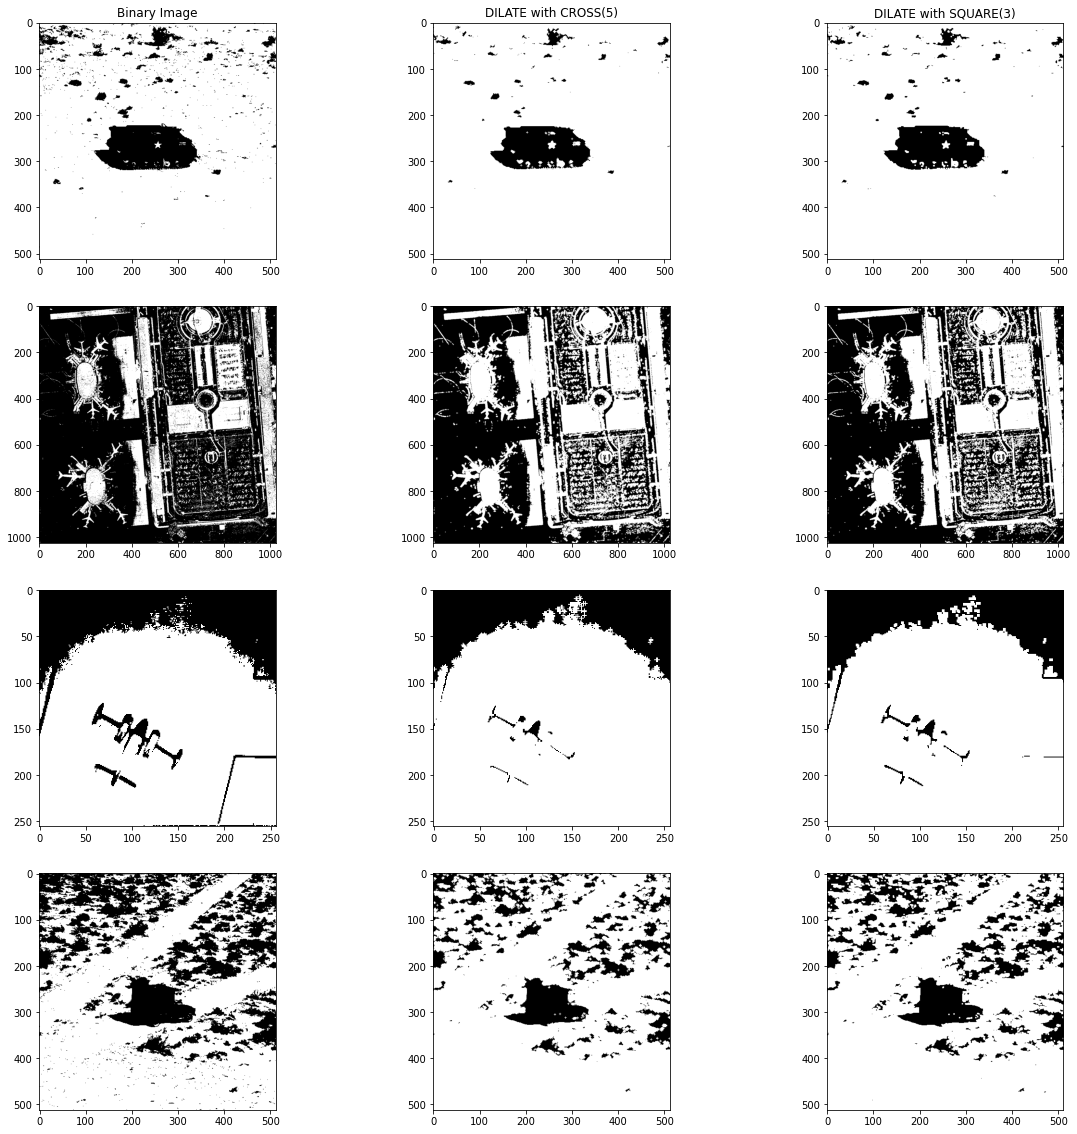

In [5]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("DILATE with CROSS(5)")
plt.imshow(bin_apc_dia_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("DILATE with SQUARE(3)")
plt.imshow(bin_apc_dia_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_dia_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_dia_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_dia_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_dia_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_dia_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_dia_sq, cmap='gray')

### ERODE

In [6]:
bin_apc_ero_cr = ERODE(bin_apc, {'CROSS': 5})
bin_apc_ero_sq = ERODE(bin_apc, {'SQUARE': 3})

bin_airport_ero_cr = ERODE(bin_airport, {'CROSS': 5})
bin_airport_ero_sq = ERODE(bin_airport, {'SQUARE': 3})

bin_airplane_ero_cr = ERODE(bin_airplane, {'CROSS': 5})
bin_airplane_ero_sq = ERODE(bin_airplane, {'SQUARE': 3})

bin_truck_ero_cr = ERODE(bin_truck, {'CROSS': 5})
bin_truck_ero_sq = ERODE(bin_truck, {'SQUARE': 3})

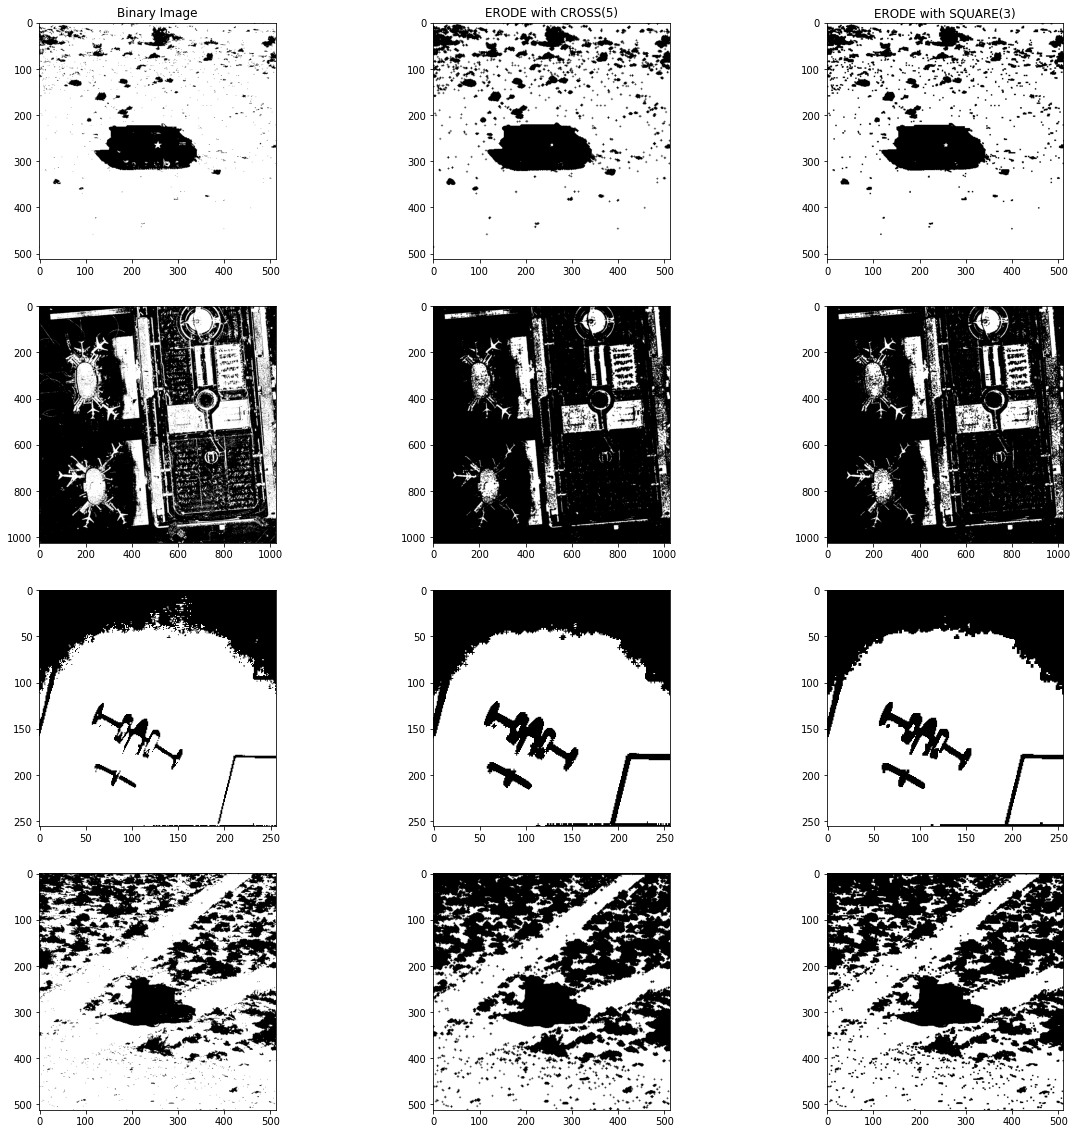

In [7]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("ERODE with CROSS(5)")
plt.imshow(bin_apc_ero_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("ERODE with SQUARE(3)")
plt.imshow(bin_apc_ero_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_ero_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_ero_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_ero_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_ero_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_ero_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_ero_sq, cmap='gray')

### MEDIAN

In [8]:
bin_apc_mea_cr = MEDIAN(bin_apc, {'CROSS': 5})
bin_apc_mea_sq = MEDIAN(bin_apc, {'SQUARE': 3})

bin_airport_mea_cr = MEDIAN(bin_airport, {'CROSS': 5})
bin_airport_mea_sq = MEDIAN(bin_airport, {'SQUARE': 3})

bin_airplane_mea_cr = MEDIAN(bin_airplane, {'CROSS': 5})
bin_airplane_mea_sq = MEDIAN(bin_airplane, {'SQUARE': 3})

bin_truck_mea_cr = MEDIAN(bin_truck, {'CROSS': 5})
bin_truck_mea_sq = MEDIAN(bin_truck, {'SQUARE': 3})

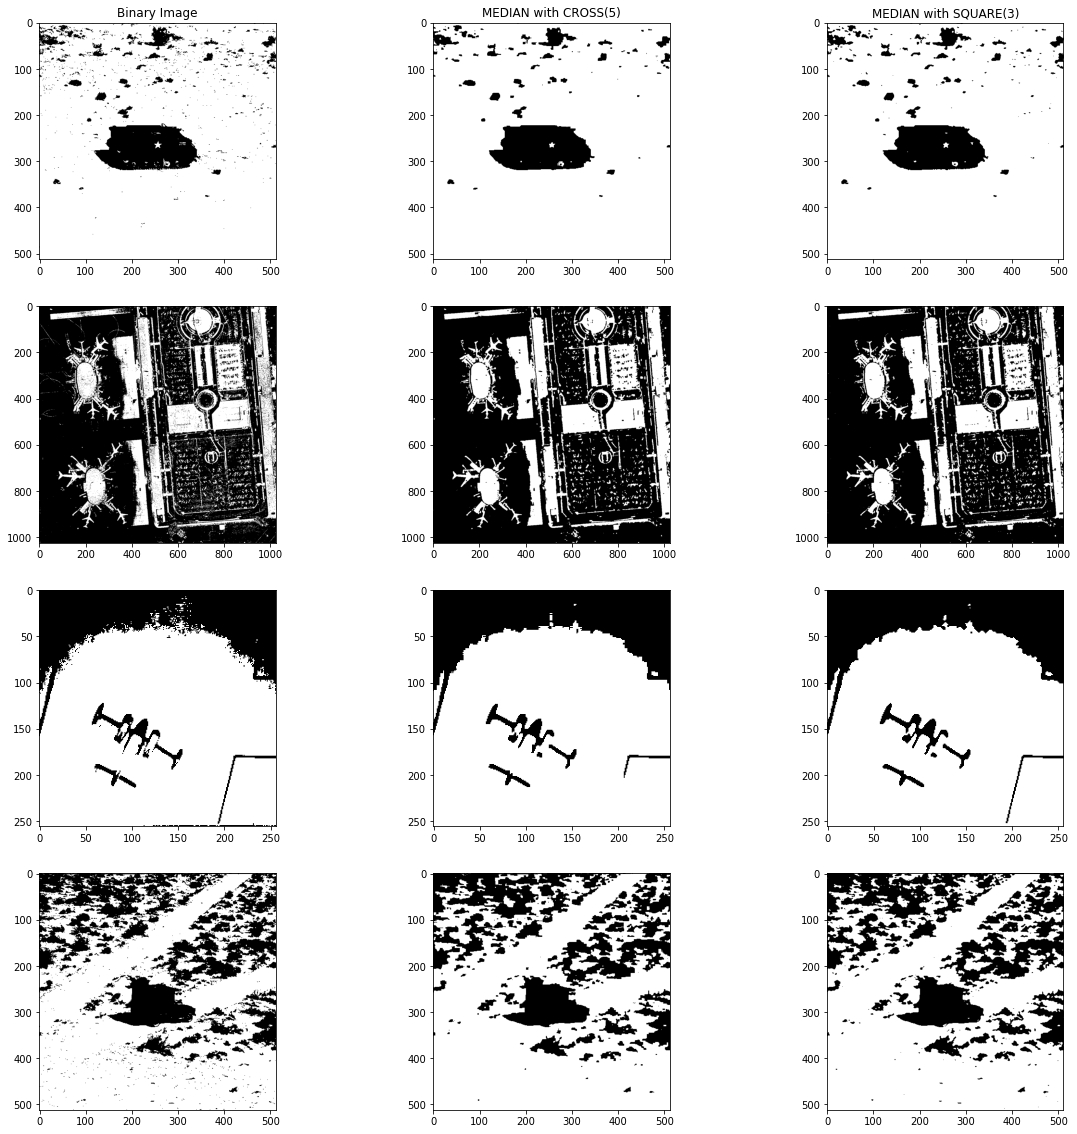

In [9]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("MEDIAN with CROSS(5)")
plt.imshow(bin_apc_mea_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("MEDIAN with SQUARE(3)")
plt.imshow(bin_apc_mea_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_mea_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_mea_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_mea_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_mea_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_mea_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_mea_sq, cmap='gray')

In [10]:
def NOT(I):
    Image = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if(I[i, j]==0):
                Image[i, j] = 1
            else:
                Image[i, j] = 0
    return Image

### Duality verification of DILATE and ERODE
#### (a) DILATE = NOT(ERODE(NOT))

Difference between direct and complement path is zero.


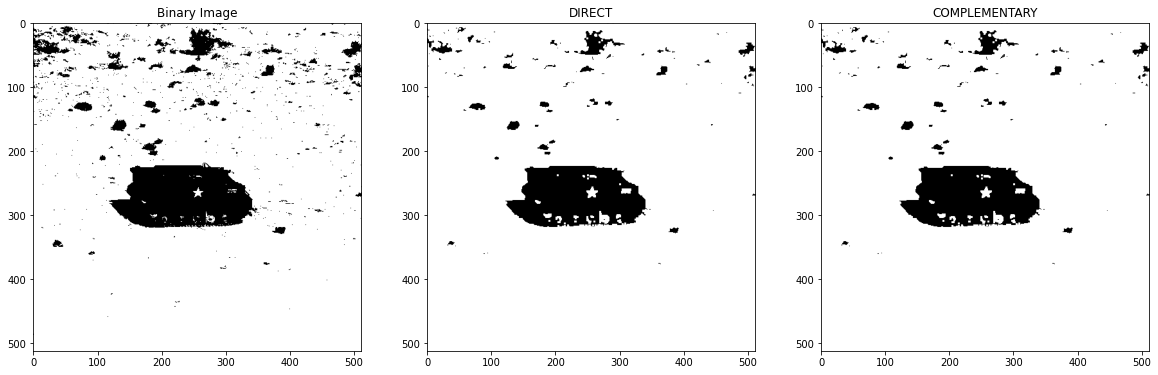

In [11]:
bin_apc_dia_c = NOT(ERODE(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_dia_sq == bin_apc_dia_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_dia_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_dia_c, cmap='gray')

#### (b) ERODE = NOT(DILATE(NOT))

Difference between direct and complement path is zero.


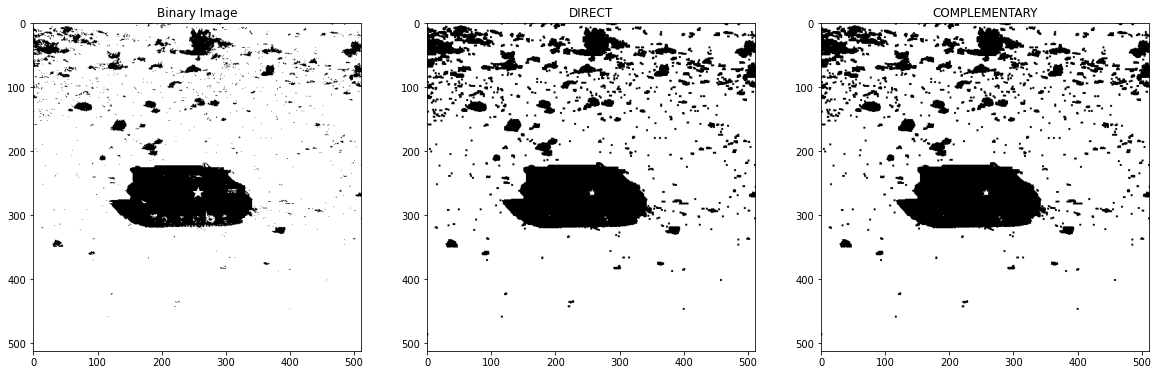

In [12]:
bin_apc_ero_c = NOT(DILATE(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_ero_sq == bin_apc_ero_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_ero_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_ero_c, cmap='gray')

#### (c) MEDIAN = NOT(MEDIAN(NOT))

Difference between direct and complement path is not zero.


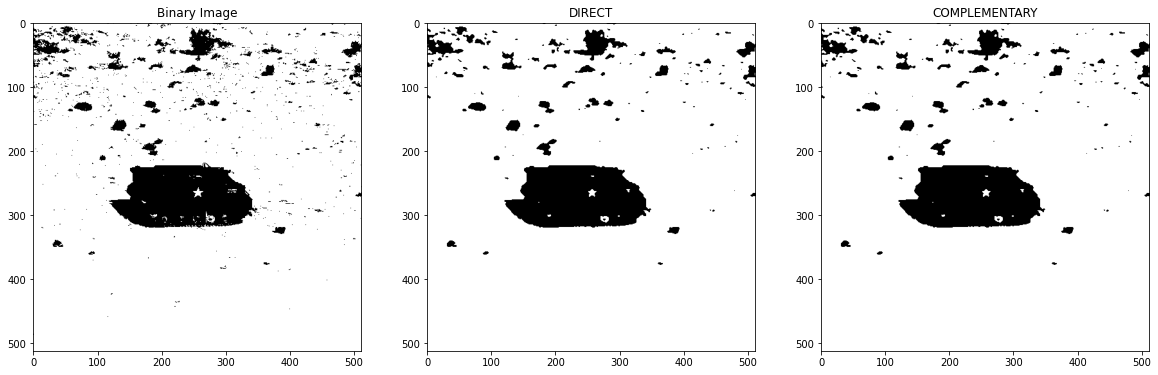

In [13]:
bin_apc_mea_c = NOT(MEDIAN(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_mea_sq == bin_apc_mea_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_mea_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_mea_c, cmap='gray')

### OPEN & CLOSE

In [14]:
def OPEN(I, B):
    return DILATE(ERODE(I, B), B)

def CLOSE(I, B):
    return ERODE(DILATE(I, B), B)

In [15]:
bin_apc_ope_cr = OPEN(bin_apc, {'CROSS': 5})
bin_apc_ope_sq = OPEN(bin_apc, {'SQUARE': 3})

bin_airport_ope_cr = OPEN(bin_airport, {'CROSS': 5})
bin_airport_ope_sq = OPEN(bin_airport, {'SQUARE': 3})

bin_airplane_ope_cr = OPEN(bin_airplane, {'CROSS': 5})
bin_airplane_ope_sq = OPEN(bin_airplane, {'SQUARE': 3})

bin_truck_ope_cr = OPEN(bin_truck, {'CROSS': 5})
bin_truck_ope_sq = OPEN(bin_truck, {'SQUARE': 3})

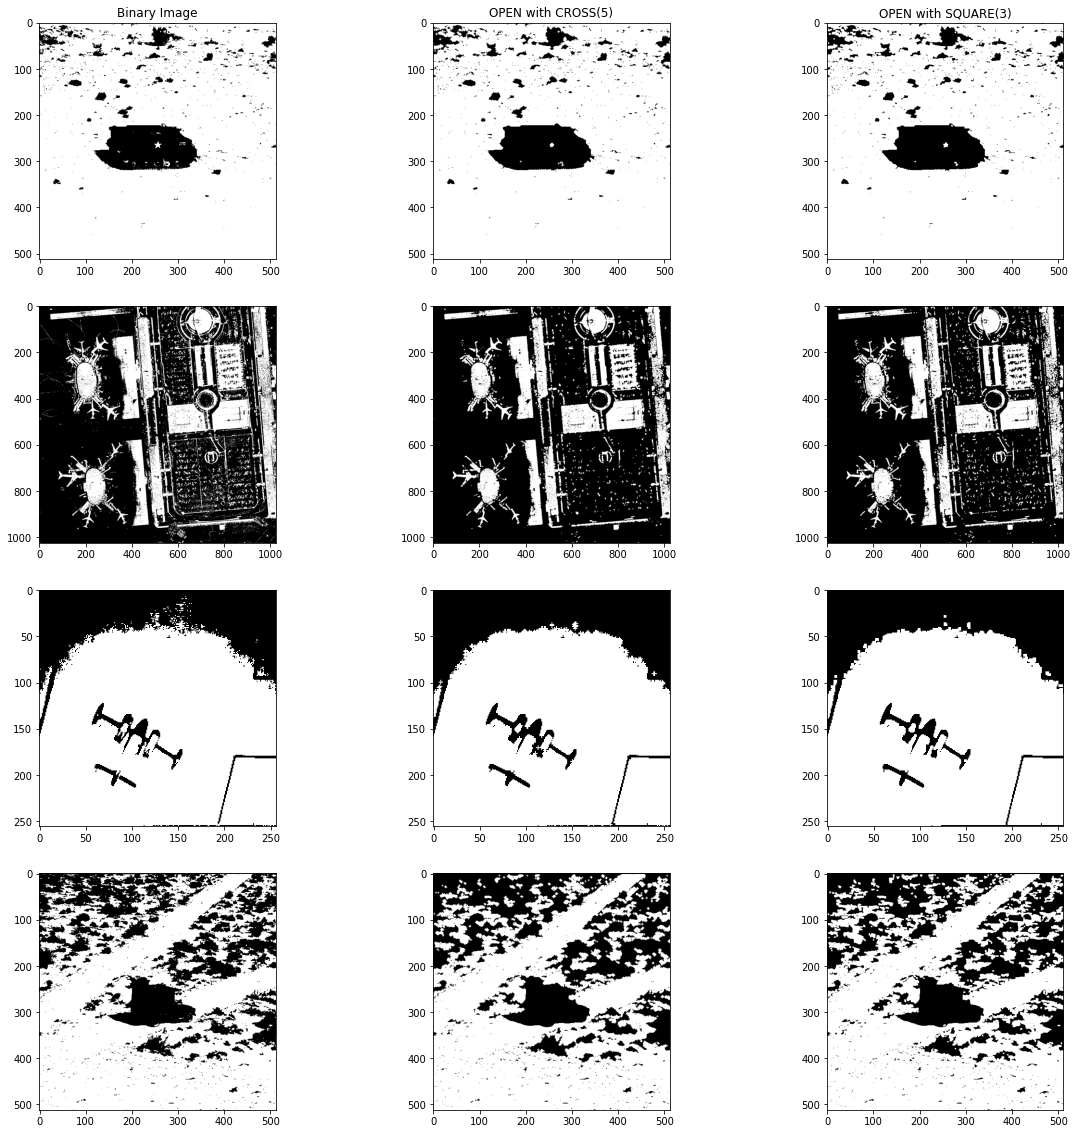

In [16]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("OPEN with CROSS(5)")
plt.imshow(bin_apc_ope_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("OPEN with SQUARE(3)")
plt.imshow(bin_apc_ope_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_ope_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_ope_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_ope_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_ope_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_ope_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_ope_sq, cmap='gray')

In [17]:
bin_apc_clo_cr = CLOSE(bin_apc, {'CROSS': 5})
bin_apc_clo_sq = CLOSE(bin_apc, {'SQUARE': 3})

bin_airport_clo_cr = CLOSE(bin_airport, {'CROSS': 5})
bin_airport_clo_sq = CLOSE(bin_airport, {'SQUARE': 3})

bin_airplane_clo_cr = CLOSE(bin_airplane, {'CROSS': 5})
bin_airplane_clo_sq = CLOSE(bin_airplane, {'SQUARE': 3})

bin_truck_clo_cr = CLOSE(bin_truck, {'CROSS': 5})
bin_truck_clo_sq = CLOSE(bin_truck, {'SQUARE': 3})

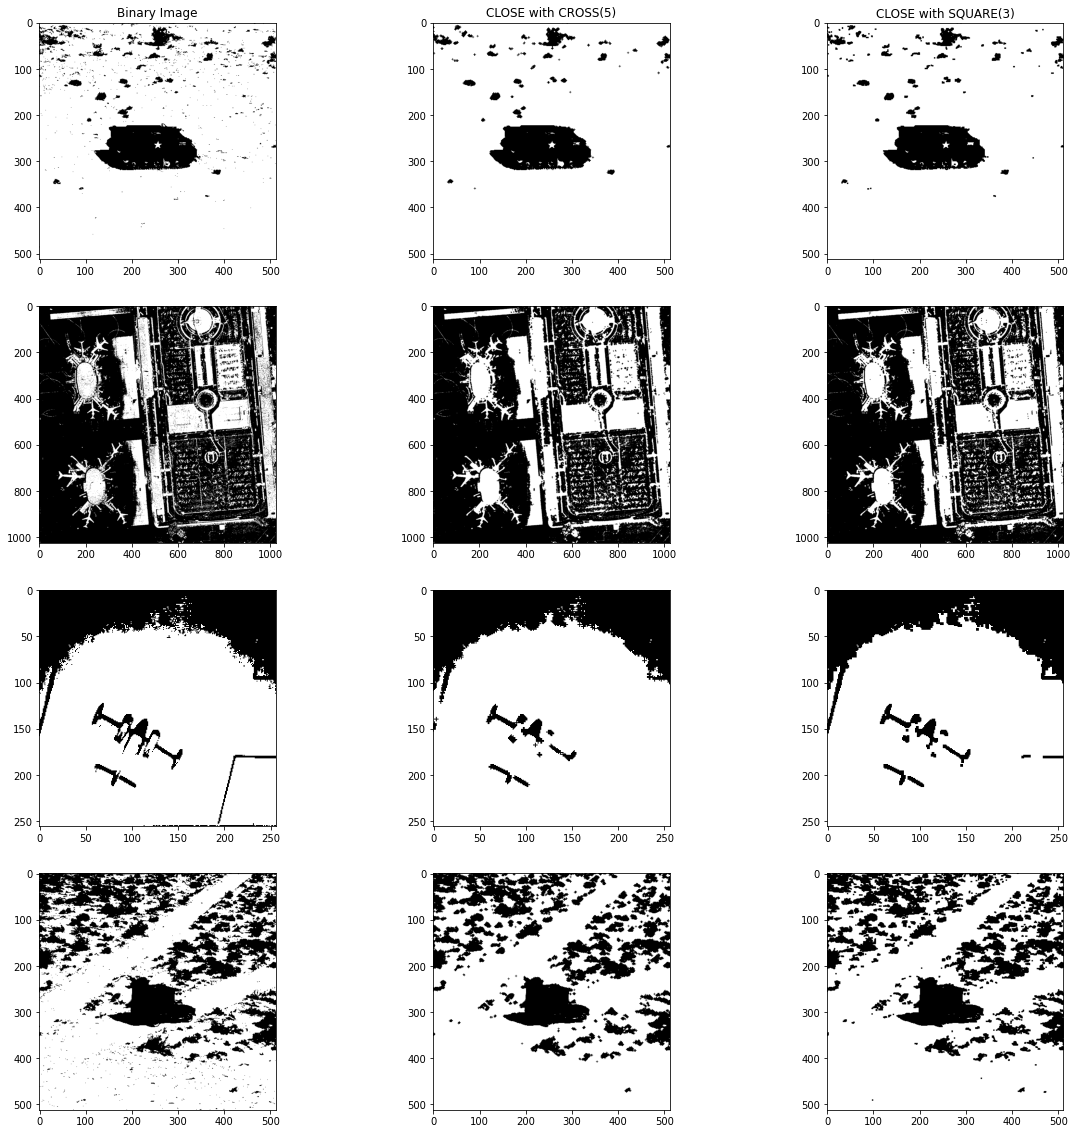

In [18]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("CLOSE with CROSS(5)")
plt.imshow(bin_apc_clo_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("CLOSE with SQUARE(3)")
plt.imshow(bin_apc_clo_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_clo_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_clo_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_clo_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_clo_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_clo_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_clo_sq, cmap='gray')

In [19]:
bin_apc_ope_clo_cr = OPEN(CLOSE(bin_apc, {'CROSS':5}), {'CROSS':5})
bin_apc_ope_clo_sq = OPEN(CLOSE(bin_apc, {'SQUARE':3}), {'SQUARE':3})

bin_apc_clo_sq_cr = CLOSE(OPEN(bin_apc, {'CROSS':5}), {'CROSS':5})
bin_apc_clo_sq_sq = CLOSE(OPEN(bin_apc, {'SQUARE':3}), {'SQUARE':3})

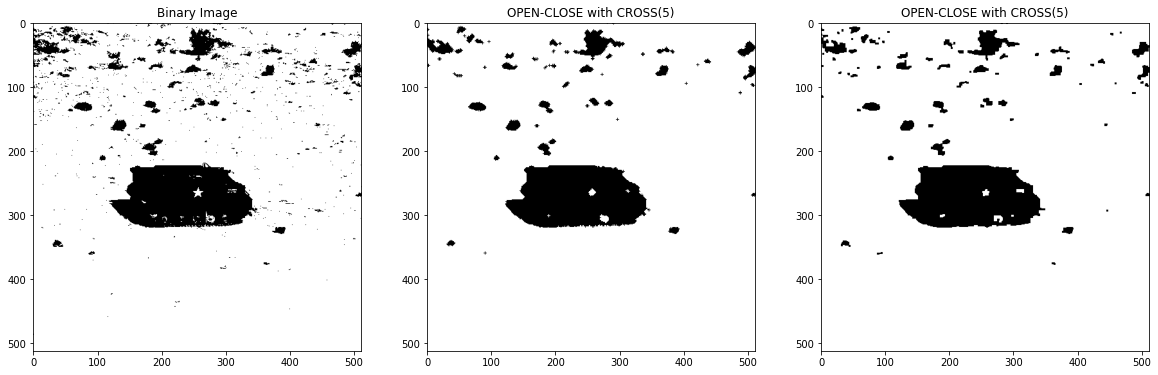

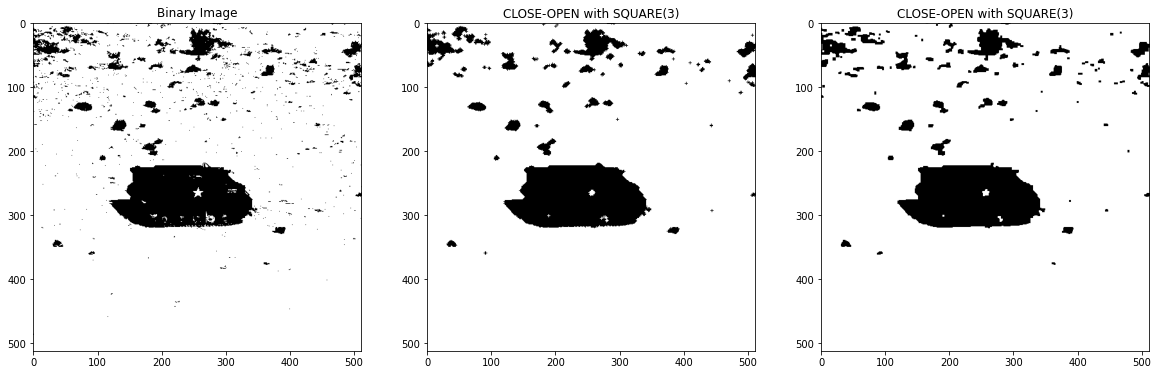

In [20]:
plt.figure()

plt.subplot(1, 3, 1)
plt.title('Binary Image')
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('OPEN-CLOSE with CROSS(5)')
plt.imshow(bin_apc_ope_clo_cr, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('OPEN-CLOSE with CROSS(5)')
plt.imshow(bin_apc_ope_clo_sq, cmap='gray')

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Binary Image')
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('CLOSE-OPEN with SQUARE(3)')
plt.imshow(bin_apc_clo_sq_cr, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('CLOSE-OPEN with SQUARE(3)')
plt.imshow(bin_apc_clo_sq_sq, cmap='gray')

In [21]:
def complement(bin_I):
    c_bin_I = bin_I.copy()
    for i in range(c_bin_I.shape[0]):
        for j in range(c_bin_I.shape[1]):
            c_bin_I[i, j] = 1 - c_bin_I[i, j]
    return c_bin_I

def get_neighbours(i, j, labels):
    M, N = labels.shape
    neighbours = []
    if(i>=1):
        neighbours.append(labels[i-1, j])
    if(j>=1):
        neighbours.append(labels[i, j-1])
    if(i<(M-1)):
        neighbours.append(labels[i+1, j])
    if(j<(N-1)):
        neighbours.append(labels[i, j+1])
     
    return neighbours

def find_set(x, disjoint_set):
    rep = min(disjoint_set[x])
    while x != rep:
        x = rep
        rep = min(disjoint_set[x])
    return rep
    
def connected_component(bin_I):
    M, N = bin_I.shape
    R = np.zeros((M, N), dtype=np.int32)
    k = 1
    disjoint_set = {}
    for i in range(M):
        for j in range(N):
            if(bin_I[i, j] == 1):
                neighbours = get_neighbours(i, j, R)
                neighbours = list(filter(lambda x: x != 0, neighbours))
                
                if(len(neighbours) == 0):
                    R[i, j] = k
                    disjoint_set[k] = set([k])
                    k += 1
                else:
                    minLabel = min(neighbours)
                    R[i, j] = minLabel
                    for neighbour in neighbours:
                        disjoint_set[neighbour] = set.union(disjoint_set[neighbour], neighbours)
    R_final = {}
    k = 1
    for i in range(M):
        for j in range(N):
            if(R[i, j] != 0):
                new_k = find_set(R[i, j], disjoint_set)
                R[i, j] = new_k
                
                if new_k not in R_final:
                    R_final[new_k] = k
                    k += 1
    
    for i in range(M):
        for j in range(N):
            if(R[i, j] != 0):
                R[i, j] = R_final[R[i, j]]
    return R

def max_blob_count(bin_I):
    R = connected_component(bin_I)
    
    (label, count) = np.unique(R.ravel(), return_counts=True)
    
    m = label[np.argmax(count)] ## Maximum blob label
    
    return count[m]

In [22]:
print("The pixel count of military vehicle is {}".format(max_blob_count(bin_apc)))

The pixel count of military vehicle is 234540


## Gray Scale Point Operations

In [165]:
import cv2

## https://apod.nasa.gov/apod/ap210801.html -> nasa_3
## https://apod.nasa.gov/apod/ap210720.html -> nasa_4
img_nasa = cv2.imread('nasa_4.jpg', cv2.IMREAD_GRAYSCALE)

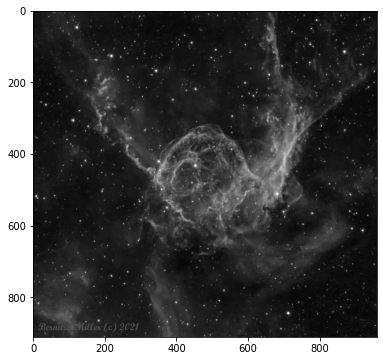

In [166]:
plt.rcParams["figure.figsize"] = (8,6)
plt.imshow(img_nasa, cmap='gray')

In [167]:
def histogram(I):
    Nbits = int(np.ceil(np.log2(np.max(I))))
    counter = np.zeros(2**Nbits)
    
    for i in I.ravel():
        counter[i] += 1
    return np.array([np.arange(2**Nbits), counter]) 

def linear_point(I, P, L):
    return np.clip(P*I + L, 0, 255).astype(int)

In [168]:
P = 2
L = 20

bin_nasa_a = linear_point(img_nasa, P, 0)
bin_nasa_b = linear_point(img_nasa, 1, L)
bin_nasa_c = linear_point(img_nasa, P, L)

In [169]:

hist_nasa = histogram(img_nasa)
hist_nasa_a = histogram(bin_nasa_a)
hist_nasa_b = histogram(bin_nasa_b)
hist_nasa_c = histogram(bin_nasa_c)

<BarContainer object of 256 artists>

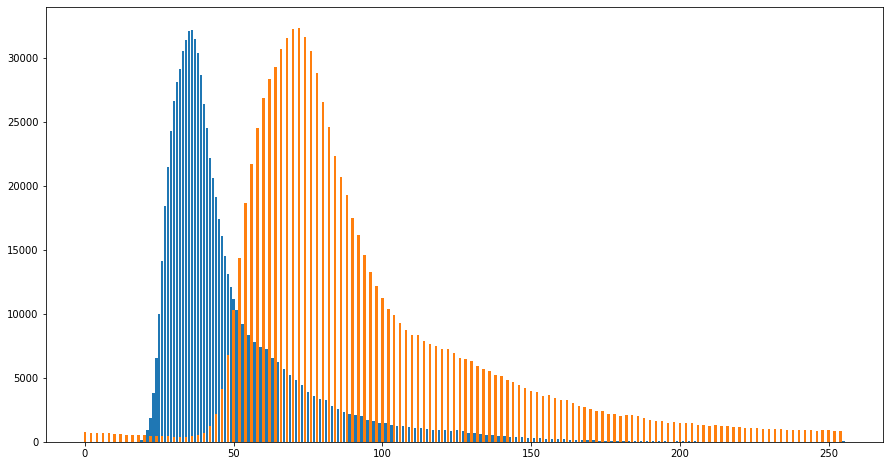

In [170]:
plt.rcParams["figure.figsize"] = (15,8)

plt.bar(hist_nasa[0], hist_nasa[1])
plt.bar(hist_nasa_a[0], hist_nasa_a[1])

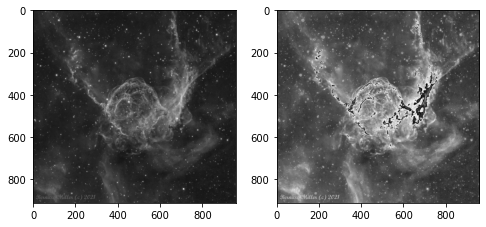

In [171]:
plt.rcParams["figure.figsize"] = (8,6)

plt.subplot(1, 2, 1)
plt.imshow(img_nasa, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(bin_nasa_a, cmap='gray', vmin=0, vmax=255)

<BarContainer object of 256 artists>

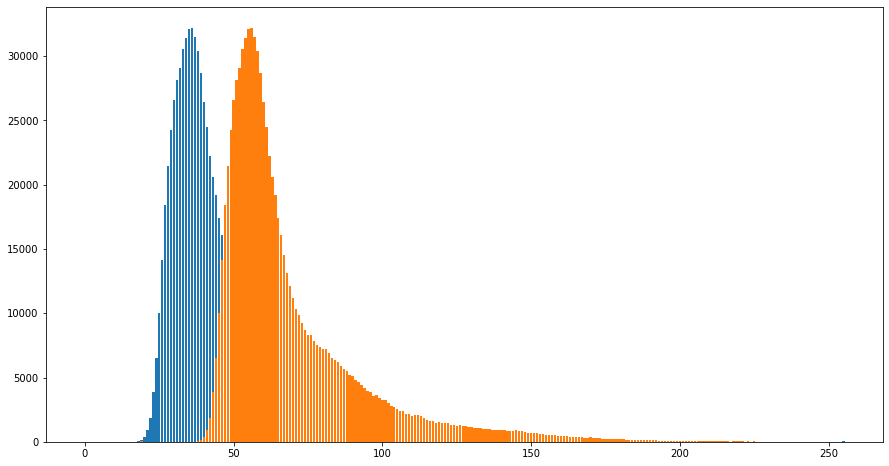

In [172]:
plt.rcParams["figure.figsize"] = (15,8)

plt.bar(hist_nasa[0], hist_nasa[1])
plt.bar(hist_nasa_b[0], hist_nasa_b[1])

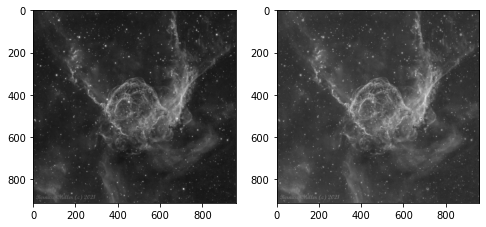

In [173]:
plt.rcParams["figure.figsize"] = (8,6)

plt.subplot(1, 2, 1)
plt.imshow(img_nasa, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(bin_nasa_b, cmap='gray', vmin=0, vmax=255)

<BarContainer object of 256 artists>

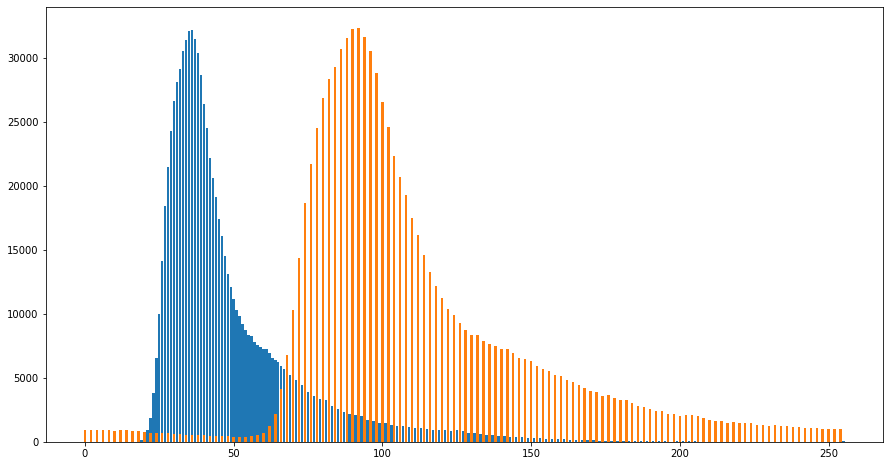

In [174]:
plt.rcParams["figure.figsize"] = (15,8)

plt.bar(hist_nasa[0], hist_nasa[1])
plt.bar(hist_nasa_c[0], hist_nasa_c[1])

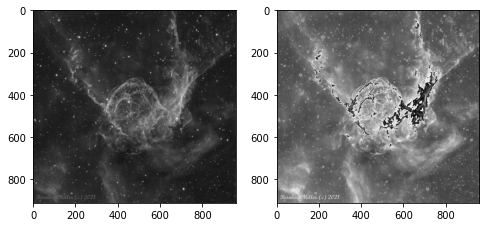

In [175]:
plt.rcParams["figure.figsize"] = (8,6)

plt.subplot(1, 2, 1)
plt.imshow(img_nasa, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(bin_nasa_c, cmap='gray', vmin=0, vmax=255)

In [218]:
def FSCS(I):
    A = np.min(I)
    B = np.max(I)
    
    P = 255/(B-A)
    L = -1*A*P
    return linear_point(I, P, L)

In [219]:
fscs_nasa = FSCS(img_nasa)
hist_fscs_nasa = histogram(fscs_nasa)

<BarContainer object of 256 artists>

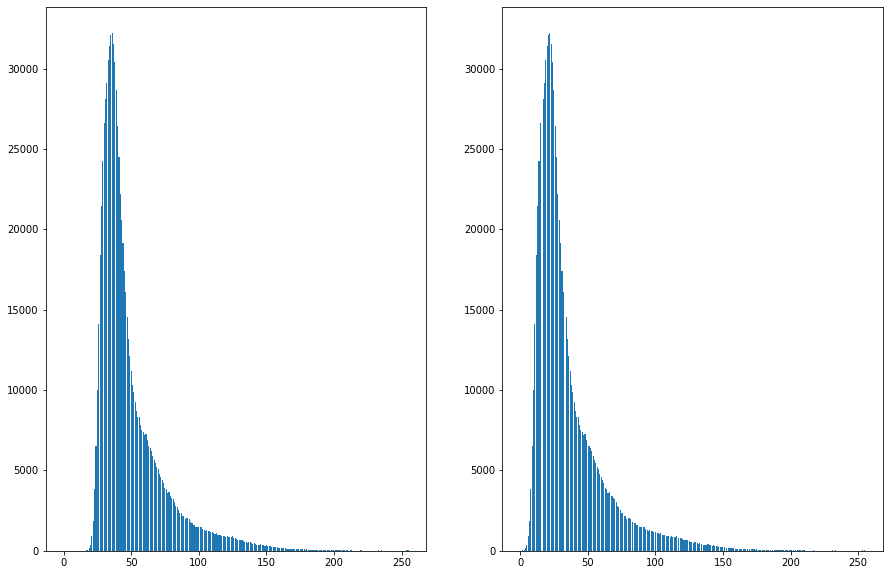

In [220]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(1, 2, 1)
plt.bar(hist_nasa[0], hist_nasa[1])

plt.subplot(1, 2, 2)
plt.bar(hist_fscs_nasa[0], hist_fscs_nasa[1])

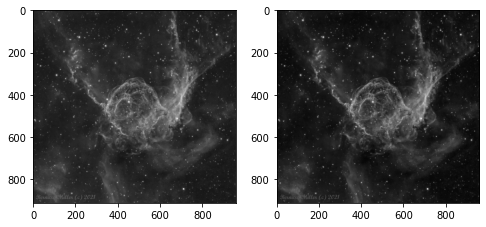

In [221]:
plt.rcParams["figure.figsize"] = (8,6)

plt.subplot(1, 2, 1)
plt.imshow(img_nasa, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(fscs_nasa, cmap='gray', vmin=0, vmax=255)

In [222]:
def log_mag_compression(I):
    J = np.log(1 + I.astype(int))
    return FSCS(J)

In [223]:
log_compre_nasa = log_mag_compression(img_nasa)
hist_log_compre_nasa = histogram(log_compre_nasa)

<BarContainer object of 256 artists>

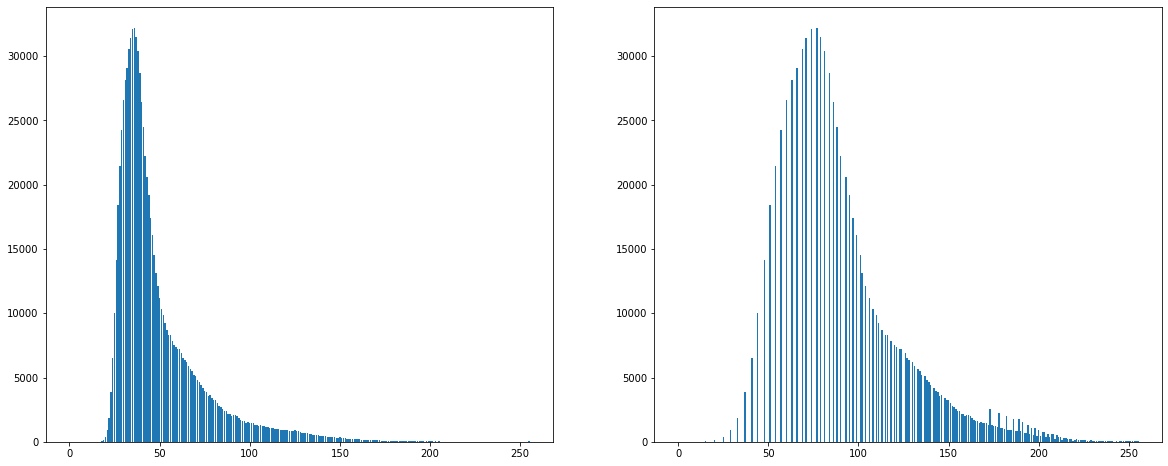

In [224]:
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(1, 2, 1)
plt.bar(hist_nasa[0], hist_nasa[1])

plt.subplot(1, 2, 2)
plt.bar(hist_log_compre_nasa[0], hist_log_compre_nasa[1])

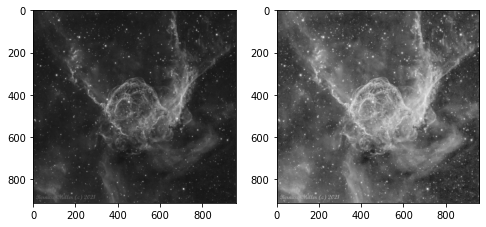

In [225]:
plt.rcParams["figure.figsize"] = (8,6)

plt.subplot(1, 2, 1)
plt.imshow(img_nasa, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(log_compre_nasa, cmap='gray', vmin=0, vmax=255)

In [226]:
def gamma_correction(I, gamma=1.4):
    return np.clip(np.power(I, gamma), 0, 255).astype(int)

In [227]:
gam_nasa = gamma_correction(img_nasa)
hist_gam_nasa = histogram(gam_nasa)

<BarContainer object of 256 artists>

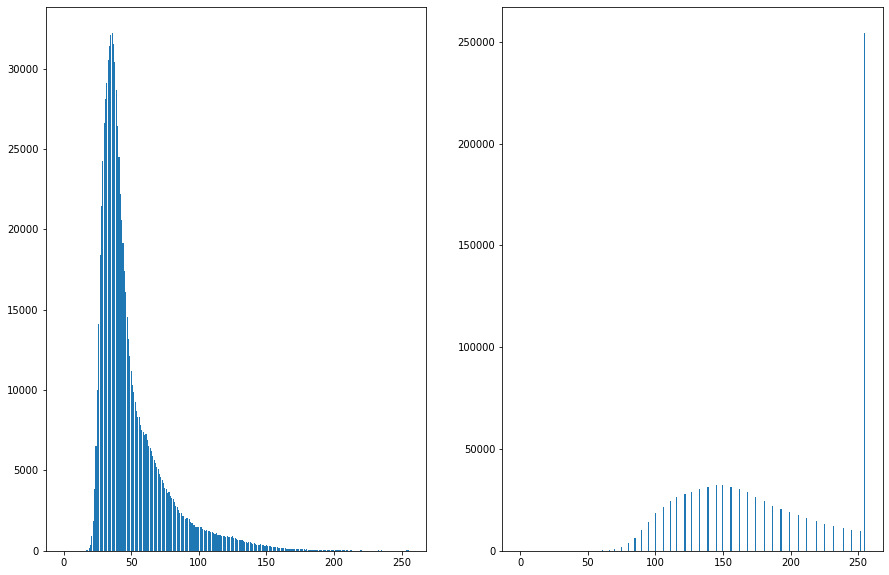

In [228]:
plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(1, 2, 1)
plt.bar(hist_nasa[0], hist_nasa[1])

plt.subplot(1, 2, 2)
plt.bar(hist_gam_nasa[0], hist_gam_nasa[1])

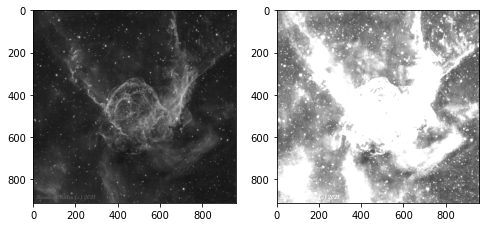

In [229]:
plt.rcParams["figure.figsize"] = (8,6)

plt.subplot(1, 2, 1)
plt.imshow(img_nasa, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(gam_nasa, cmap='gray', vmin=0, vmax=255)

In [230]:
def histogram_flattener(I):
    hist = histogram(I)
    cdf = hist[1]
    for i in range(1, 255):
        cdf[i] += cdf[i-1]
    cdf = cdf/(I.shape[0] * I.shape[1])
    J = cdf[I]
    J = FSCS(J)
    return J

In [231]:
hist_flat_nasa = histogram_flattener(img_nasa)
hist_hist_flat_nasa = histogram(hist_flat_nasa)

<BarContainer object of 256 artists>

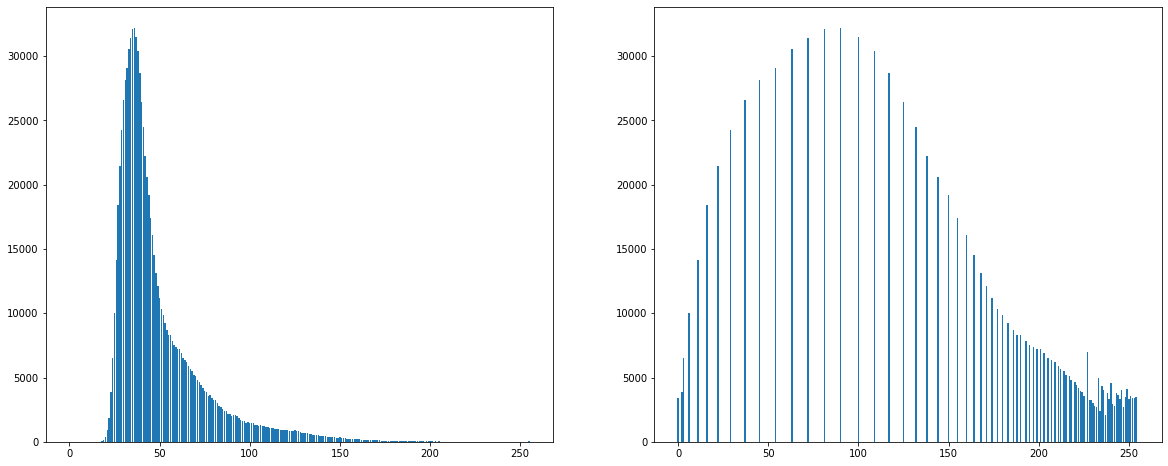

In [232]:
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(1, 2, 1)
plt.bar(hist_nasa[0], hist_nasa[1])

plt.subplot(1, 2, 2)
plt.bar(hist_hist_flat_nasa[0], hist_hist_flat_nasa[1])

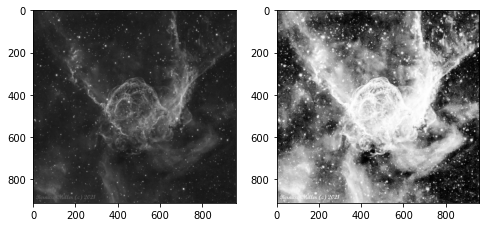

In [233]:
plt.rcParams["figure.figsize"] = (8,6)

plt.subplot(1, 2, 1)
plt.imshow(img_nasa, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(hist_flat_nasa, cmap='gray', vmin=0, vmax=255)

## Image Zooming

In [235]:
# https://apod.nasa.gov/apod/ap210822.html -> nasa_6
# https://apod.nasa.gov/apod/ap210910.html -> nasa_5
# https://apod.nasa.gov/apod/ap210718.html -> nasa_7

In [236]:
img_nasa_5 = cv2.imread('nasa_5.jpg', cv2.IMREAD_GRAYSCALE)
img_nasa_6 = cv2.imread('nasa_6.jpg', cv2.IMREAD_GRAYSCALE)
img_nasa_7 = cv2.imread('nasa_7.jpg', cv2.IMREAD_GRAYSCALE)

In [237]:
def nearest_neighbour(I):
    M, N = I.shape
    image = np.zeros((int(1.5*M), int(1.5*N)))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i, j] = I[i//2, j//2]
    return image

In [243]:
z_img_nasa_5 = nearest_neighbour(img_nasa_5)
z_img_nasa_6 = nearest_neighbour(img_nasa_6)
z_img_nasa_7 = nearest_neighbour(img_nasa_7)

In [265]:
def interpolate(I, nearst_neighbours):
    M = np.array([[1, nearst_neighbours[0,0], nearst_neighbours[0,1], nearst_neighbours[0,0]*nearst_neighbours[0,1]],
                  [1, nearst_neighbours[1,0], nearst_neighbours[1,1], nearst_neighbours[1,0]*nearst_neighbours[1,1]],
                  [1, nearst_neighbours[2,0], nearst_neighbours[2,1], nearst_neighbours[2,0]*nearst_neighbours[2,1]],
                  [1, nearst_neighbours[3,0], nearst_neighbours[3,1], nearst_neighbours[3,0]*nearst_neighbours[3,1]]])
    
    return np.dot(np.linalg.inv(M), np.array([I[nearst_neighbours[0,0], nearst_neighbours[0,1]],
                                              I[nearst_neighbours[1,0], nearst_neighbours[1,1]],
                                              I[nearst_neighbours[2,0], nearst_neighbours[2,1]],
                                              I[nearst_neighbours[3,0], nearst_neighbours[3,1]]]).reshape(-1, 1))

def bilinear_interpolation(I):
    M, N = I.shape
    image = np.zeros((int(1.5*M), int(1.5*N)))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i, j] = I[i//2, j//2]
    for i in range(image.shape[0]-2):
        for j in range(image.shape[1]-2): 
            coeffs = interpolate(image, np.array([[i, j], [i + 2, j], [i, j + 2], [i + 2, j + 2]]))
            
            for p in range(2):
                for q in range(2):
                    IDX = np.array([1, i+p, j+q, (i+p)*(j+q)]).reshape(-1, 1)
                    image[i+p, j+q] = np.dot(coeffs.T, IDX)
    return image

In [266]:
bl_img_nasa_5 = bilinear_interpolation(img_nasa_5)
bl_img_nasa_6 = bilinear_interpolation(img_nasa_6)
bl_img_nasa_7 = bilinear_interpolation(img_nasa_7)

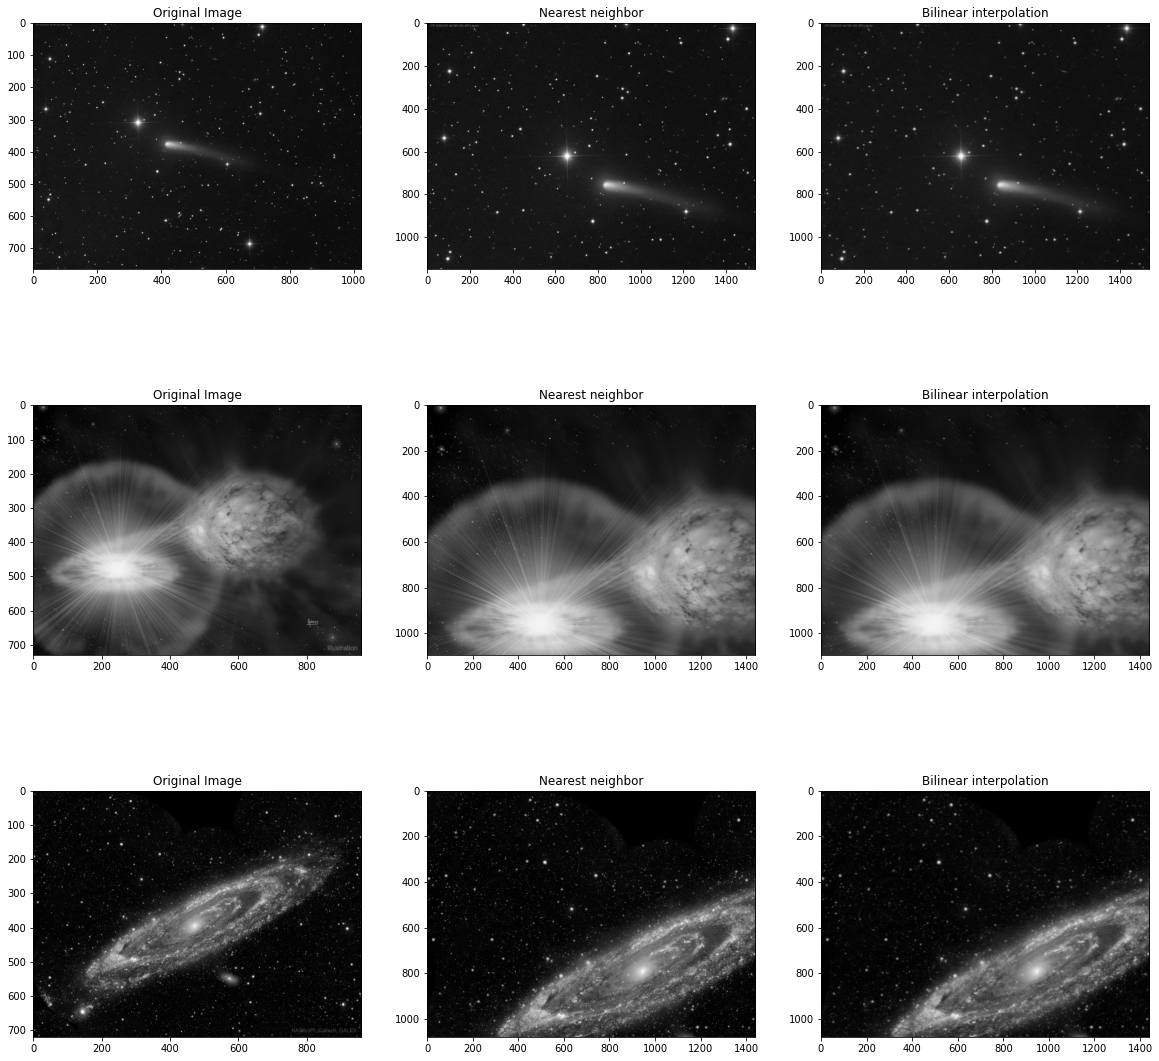

In [267]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(img_nasa_5, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 2)
plt.title("Nearest neighbor")
plt.imshow(z_img_nasa_5, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 3)
plt.title("Bilinear interpolation")
plt.imshow(bl_img_nasa_5, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 4)
plt.title("Original Image")
plt.imshow(img_nasa_6, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 5)
plt.title("Nearest neighbor")
plt.imshow(z_img_nasa_6, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 6)
plt.title("Bilinear interpolation")
plt.imshow(bl_img_nasa_6, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 7)
plt.title("Original Image")
plt.imshow(img_nasa_7, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 8)
plt.title("Nearest neighbor")
plt.imshow(z_img_nasa_7, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 3, 9)
plt.title("Bilinear interpolation")
plt.imshow(bl_img_nasa_7, cmap='gray', vmin=0, vmax=255)
